In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import sklearn.linear_model as lm
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
d = pd.read_csv("clean.csv")

In [4]:
pd.options.display.max_rows=3000
#print(d)
print(d.tail(10))
pd.options.display.max_rows=20

            Date  Mileage time_corr  pace_min
2373  2019-11-24    14.00   1:37:02  6.930952
2374  2019-11-27     5.02   0:36:08  7.197875
2375  2019-11-28     6.15   0:42:22  6.888889
2376  2019-11-29     6.26   0:46:15  7.388179
2377  2019-11-30     3.11   0:15:44  5.058950
2378  2019-11-30     4.90       NaN       NaN
2379  2019-12-03     7.28   0:53:04  7.289377
2380  2019-12-04     9.58       NaN       NaN
2381  2019-12-05     7.00   0:50:33  7.221429
2382  2019-12-06     4.09   0:27:53  6.817441


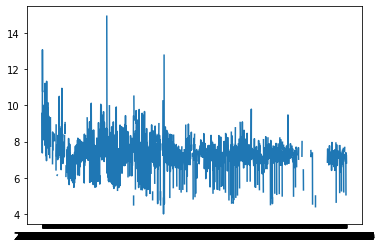

In [36]:
plt.plot(d['Date'], d['pace_min'])
plt.show()

(array([  40.,  121.,  358., 1025.,  215.,   44.]),
 array([ 4,  5,  6,  7,  8,  9, 10]),
 <a list of 6 Patch objects>)

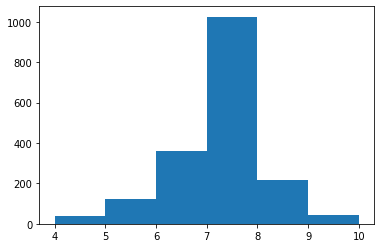

In [5]:
plt.hist(d['pace_min'], bins = [4,5,6,7,8,9,10])

In [6]:
k5 = d[(d['Mileage'] > 3.09) & (d['Mileage'] < 3.12)]
pd.options.display.max_rows=130
print(k5)
pd.options.display.max_rows=20

            Date  Mileage time_corr  pace_min
0     2009-04-25     3.10   0:29:38  9.559140
1     2009-11-21     3.10   0:22:51  7.370968
20    2010-04-24     3.10   0:24:12  7.806452
67    2010-08-20     3.10   0:20:59  6.768817
69    2010-08-24     3.10   0:21:15  6.854839
74    2010-09-01     3.10   0:21:01  6.779570
80    2010-09-13     3.10   0:21:10  6.827957
82    2010-09-18     3.10   0:19:27  6.274194
84    2010-09-21     3.10   0:20:26  6.591398
92    2010-10-02     3.10   0:19:39  6.338710
95    2010-10-07     3.10   0:19:42  6.354839
99    2010-10-15     3.10   0:19:57  6.435484
107   2010-10-29     3.10   0:19:01  6.134409
119   2010-12-18     3.10   0:25:00  8.064516
124   2011-01-04     3.10   0:22:32  7.268817
125   2011-01-07     3.10   0:24:18  7.838710
126   2011-01-13     3.10   0:23:00  7.419355
136   2011-02-13     3.10   0:19:59  6.446237
147   2011-06-10     3.10   0:21:40  6.989247
149   2011-06-17     3.10   0:21:56  7.075269
150   2011-06-21     3.10   0:22:1

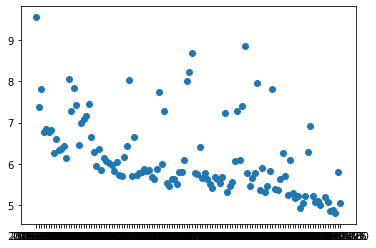

In [7]:
plt.scatter(k5['Date'], k5['pace_min'])
plt.show()

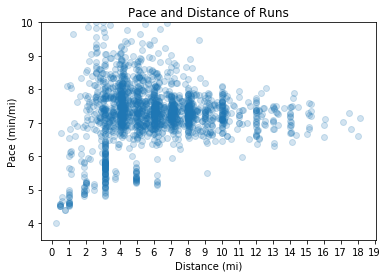

<Figure size 432x288 with 0 Axes>

In [8]:
plt.ylim(3.5, 10)
plt.scatter(d['Mileage'], d['pace_min'], alpha=0.2)
plt.xticks(np.arange(0, max(d['Mileage'])+1, 1.0))
plt.xlabel("Distance (mi)")
plt.ylabel("Pace (min/mi)")
plt.title("Pace and Distance of Runs")
plt.show()
plt.savefig("pace_distance.png")

In [9]:
dna = d.dropna()
print(dna)

            Date  Mileage time_corr   pace_min
0     2009-04-25     3.10   0:29:38   9.559140
1     2009-11-21     3.10   0:22:51   7.370968
2     2010-01-04     1.30   0:17:00  13.076923
3     2010-01-05     2.60   0:28:00  10.769231
4     2010-01-07     2.60   0:28:00  10.769231
6     2010-01-14     2.60   0:26:00  10.000000
7     2010-01-16     4.05   0:35:48   8.839506
8     2010-01-19     2.60   0:24:00   9.230769
9     2010-01-25     2.66   0:24:15   9.116541
10    2010-01-26     2.60   0:24:19   9.352564
...          ...      ...       ...        ...
2370  2019-11-21     6.21   0:44:23   7.147075
2371  2019-11-22     8.22   0:58:04   7.064071
2373  2019-11-24    14.00   1:37:02   6.930952
2374  2019-11-27     5.02   0:36:08   7.197875
2375  2019-11-28     6.15   0:42:22   6.888889
2376  2019-11-29     6.26   0:46:15   7.388179
2377  2019-11-30     3.11   0:15:44   5.058950
2379  2019-12-03     7.28   0:53:04   7.289377
2381  2019-12-05     7.00   0:50:33   7.221429
2382  2019-12

In [77]:
st.pearsonr(dna['Mileage'], dna['pace_min'])

(0.06038241790413832, 0.010039784744218246)

In [11]:
dna.dtypes

Date          object
Mileage      float64
time_corr     object
pace_min     float64
dtype: object

In [12]:
x = np.array(dna['Mileage'].tolist())
x = x.reshape(-1, 1)
y = np.array(dna['pace_min'].tolist())
y = y.reshape(-1, 1)
model = lm.LinearRegression().fit(x, y)

In [13]:
r_sq = model.score(x,y)
print('R-Squared:', r_sq)

R-Squared: 0.003646036391950269


In [14]:
print(d)

            Date  Mileage time_corr   pace_min
0     2009-04-25     3.10   0:29:38   9.559140
1     2009-11-21     3.10   0:22:51   7.370968
2     2010-01-04     1.30   0:17:00  13.076923
3     2010-01-05     2.60   0:28:00  10.769231
4     2010-01-07     2.60   0:28:00  10.769231
5     2010-01-11     1.30       NaN        NaN
6     2010-01-14     2.60   0:26:00  10.000000
7     2010-01-16     4.05   0:35:48   8.839506
8     2010-01-19     2.60   0:24:00   9.230769
9     2010-01-25     2.66   0:24:15   9.116541
...          ...      ...       ...        ...
2373  2019-11-24    14.00   1:37:02   6.930952
2374  2019-11-27     5.02   0:36:08   7.197875
2375  2019-11-28     6.15   0:42:22   6.888889
2376  2019-11-29     6.26   0:46:15   7.388179
2377  2019-11-30     3.11   0:15:44   5.058950
2378  2019-11-30     4.90       NaN        NaN
2379  2019-12-03     7.28   0:53:04   7.289377
2380  2019-12-04     9.58       NaN        NaN
2381  2019-12-05     7.00   0:50:33   7.221429
2382  2019-12

In [18]:
ds = d["Date"].str.split(pat = "-", expand = True)
dsd = pd.concat([d, ds], axis=1, sort=False)
ymd = dsd.rename(columns={0: "year", 1: "month", 2: "day"})
print(ymd)

            Date  Mileage time_corr   pace_min  year month day
0     2009-04-25     3.10   0:29:38   9.559140  2009    04  25
1     2009-11-21     3.10   0:22:51   7.370968  2009    11  21
2     2010-01-04     1.30   0:17:00  13.076923  2010    01  04
3     2010-01-05     2.60   0:28:00  10.769231  2010    01  05
4     2010-01-07     2.60   0:28:00  10.769231  2010    01  07
5     2010-01-11     1.30       NaN        NaN  2010    01  11
6     2010-01-14     2.60   0:26:00  10.000000  2010    01  14
7     2010-01-16     4.05   0:35:48   8.839506  2010    01  16
8     2010-01-19     2.60   0:24:00   9.230769  2010    01  19
9     2010-01-25     2.66   0:24:15   9.116541  2010    01  25
...          ...      ...       ...        ...   ...   ...  ..
2373  2019-11-24    14.00   1:37:02   6.930952  2019    11  24
2374  2019-11-27     5.02   0:36:08   7.197875  2019    11  27
2375  2019-11-28     6.15   0:42:22   6.888889  2019    11  28
2376  2019-11-29     6.26   0:46:15   7.388179  2019   

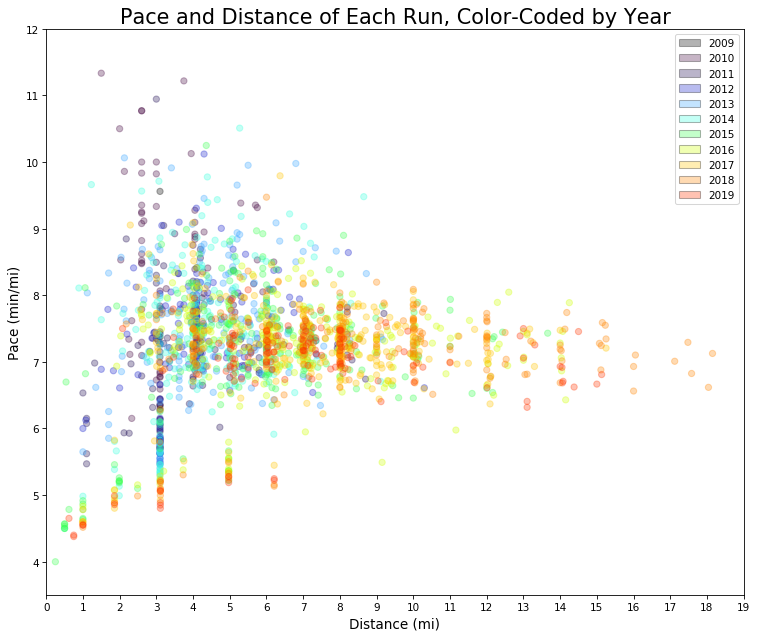

In [74]:
col_dict = {'2009':'#000000', '2010':'#450842', '2011':'#1B0951', '2012':'#1620CD' , '2013':'#3AA6FF' , '2014':'#3AFFDE' , '2015':'#3AFF51' , '2016':'#D0FF00', '2017':'#FFC600', '2018':'#FF8600', '2019':'#FF3600'}
ymd['colcol'] = ymd['year'].map(col_dict)

fig = plt.figure(figsize=(12,10),dpi=75)
plt.xticks(np.arange(0, max(d['Mileage'])+1, 1.0))
plt.xlim(0,19)
plt.ylim(3.5, 12)
ax = fig.gca()
ax.scatter(ymd['Mileage'],ymd['pace_min'],c=ymd['colcol'],alpha=0.3)
ax.set_xlabel('Distance (mi)', fontsize=13)
ax.set_ylabel('Pace (min/mi)', fontsize=13)
ax.set_title('Pace and Distance of Each Run, Color-Coded by Year', fontsize=20)

#retrieve values from color dictionary and attribute it to corresponding labels
leg_el = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 0.3) for key, value in col_dict.items()]
ax.legend(handles = leg_el)
plt.savefig("pace_distance.png")

In [83]:
ymdna = ymd.dropna()
print(ymdna)

            Date  Mileage time_corr   pace_min  year month day   colcol
0     2009-04-25     3.10   0:29:38   9.559140  2009    04  25  #000000
1     2009-11-21     3.10   0:22:51   7.370968  2009    11  21  #000000
2     2010-01-04     1.30   0:17:00  13.076923  2010    01  04  #450842
3     2010-01-05     2.60   0:28:00  10.769231  2010    01  05  #450842
4     2010-01-07     2.60   0:28:00  10.769231  2010    01  07  #450842
6     2010-01-14     2.60   0:26:00  10.000000  2010    01  14  #450842
7     2010-01-16     4.05   0:35:48   8.839506  2010    01  16  #450842
8     2010-01-19     2.60   0:24:00   9.230769  2010    01  19  #450842
9     2010-01-25     2.66   0:24:15   9.116541  2010    01  25  #450842
10    2010-01-26     2.60   0:24:19   9.352564  2010    01  26  #450842
...          ...      ...       ...        ...   ...   ...  ..      ...
2370  2019-11-21     6.21   0:44:23   7.147075  2019    11  21  #FF3600
2371  2019-11-22     8.22   0:58:04   7.064071  2019    11  22  

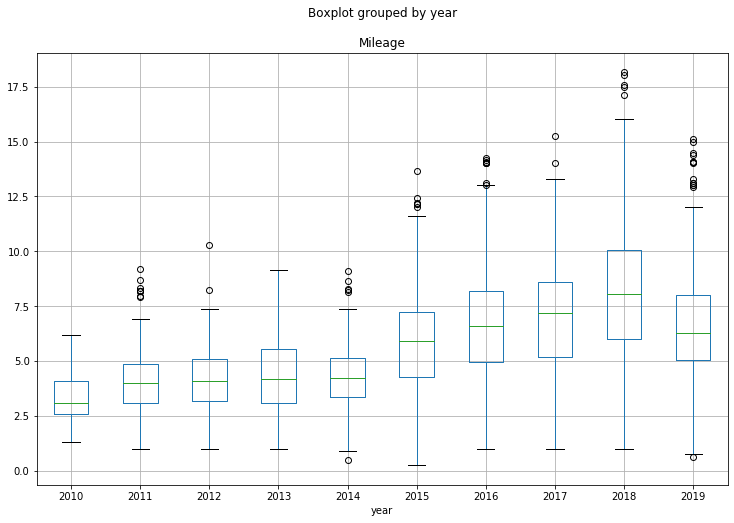

In [126]:
ymd2010s = ymdna[(ymdna['year'] != '2009')]

ymd2010s.boxplot('Mileage', by='year', figsize=(12, 8))

In [127]:
dist_by_yr = ols('Mileage ~ C(year)', data=ymd2010s).fit()
dist_by_yr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Mileage   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     73.20
Date:                Tue, 10 Dec 2019   Prob (F-statistic):          2.13e-115
Time:                        15:41:06   Log-Likelihood:                -4208.3
No. Observations:                1815   AIC:                             8437.
Df Residuals:                    1805   BIC:                             8492.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.5200      0.277     12.689      0.000       2.976       4.064
C(year)[T.2011]     0.6137      0.360      1.703      0.089      -0.093       1.320
C(year)[T.2012]     0.8142      0.344      2.364      0.018       0.139       1.490
C(year)[T.2013]     0.8469      0.344      2.462      0.014       0.172       1.522
C(year)[T.2014]     0.8816      0.326      2.704      0.007       0.242       1.521
C(year)[T.2015]     2.3114      0.320      7.224      0.000       1.684       2.939
C(year)[T.2016]     3.3518      0.319     10.518      0.000       2.727       3.977
C(year)[T.2017]     3.5063      0.316     11.099      0.000       2.887       4.126
C(year)[T.2018]     4.8516      0.324     14.984      0.000       4.217       5.487
C(year)[T.2019]     3.3007      0.342      9.641      0.000       2.629       3.972
==============================================================================
Omnibus:                      116.899   Durbin-Watson:                   1.782
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.260
Skew:                           0.502   Prob(JB):                     7.99e-42
Kurtosis:                       4.223   Cond. No.                         16.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

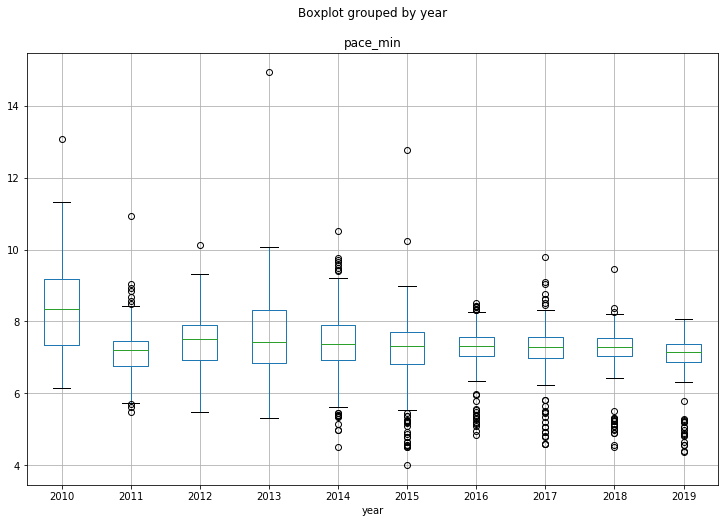

In [128]:
ymd2010s.boxplot('pace_min', by='year', figsize=(12, 8))

In [129]:
pace_by_yr = ols('pace_min ~ C(year)', data=ymd2010s).fit()
pace_by_yr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               pace_min   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     18.04
Date:                Tue, 10 Dec 2019   Prob (F-statistic):           5.61e-29
Time:                        15:42:22   Log-Likelihood:                -2377.8
No. Observations:                1815   AIC:                             4776.
Df Residuals:                    1805   BIC:                             4831.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           8.3414      0.101     82.440      0.000       8.143       8.540
C(year)[T.2011]    -1.1753      0.131     -8.944      0.000      -1.433      -0.918
C(year)[T.2012]    -0.9910      0.126     -7.890      0.000      -1.237      -0.745
C(year)[T.2013]    -0.7923      0.125     -6.315      0.000      -1.038      -0.546
C(year)[T.2014]    -0.9320      0.119     -7.836      0.000      -1.165      -0.699
C(year)[T.2015]    -1.1536      0.117     -9.884      0.000      -1.383      -0.925
C(year)[T.2016]    -1.1178      0.116     -9.616      0.000      -1.346      -0.890
C(year)[T.2017]    -1.1148      0.115     -9.674      0.000      -1.341      -0.889
C(year)[T.2018]    -1.1665      0.118     -9.877      0.000      -1.398      -0.935
C(year)[T.2019]    -1.4271      0.125    -11.429      0.000      -1.672      -1.182
==============================================================================
Omnibus:                      199.009   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1715.762
Skew:                           0.014   Prob(JB):                         0.00
Kurtosis:                       7.763   Cond. No.                         16.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [130]:
ymd2011on = ymd2010s[(ymd2010s['year'] != '2010')]
pace_by_yr2011 = ols('pace_min ~ C(year)', data=ymd2011on).fit()
pace_by_yr2011.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               pace_min   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     6.565
Date:                Tue, 10 Dec 2019   Prob (F-statistic):           1.82e-08
Time:                        15:43:57   Log-Likelihood:                -2224.5
No. Observations:                1736   AIC:                             4467.
Df Residuals:                    1727   BIC:                             4516.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           7.1661      0.081     87.950      0.000       7.006       7.326
C(year)[T.2012]     0.1843      0.109      1.692      0.091      -0.029       0.398
C(year)[T.2013]     0.3831      0.109      3.522      0.000       0.170       0.596
C(year)[T.2014]     0.2434      0.102      2.395      0.017       0.044       0.443
C(year)[T.2015]     0.0217      0.099      0.219      0.827      -0.173       0.216
C(year)[T.2016]     0.0575      0.099      0.583      0.560      -0.136       0.251
C(year)[T.2017]     0.0605      0.098      0.621      0.535      -0.131       0.252
C(year)[T.2018]     0.0089      0.101      0.088      0.930      -0.189       0.206
C(year)[T.2019]    -0.2518      0.108     -2.328      0.020      -0.464      -0.040
==============================================================================
Omnibus:                      205.318   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1916.228
Skew:                          -0.101   Prob(JB):                         0.00
Kurtosis:                       8.143   Cond. No.                         12.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""